In [11]:
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [12]:
from WriteCMapGSP import read_mapC
from WriteTMapGSP import read_mapT

In [15]:
file_name = "Reynolds_CEOD_data_mohamed_2019_feb_1-9_2_sampled"
GEnx_OD, GEnx_OD_true, _, All_Reynolds = pickle.load(open(f"Sampled flights/{file_name}.p", "rb"))

file_name = "Reynolds_CEOD_data_mohamed_2019_feb_1-9_2.p"
_, _, _, alt_time, _ = pickle.load(open("Reynolds_pickle/valid/" + file_name, "rb"))

All_validation_params, ALL_PRs, All_ETAs, All_Ws, All_TR, All_Fn, All_Tt, All_Pt, _ = pickle.load(
                    open("Results/Results_one_equation_DP_calibration_Nozzles_data_mohamed_2019_feb_1-9_2.p", "rb"))
        
Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = All_Reynolds.T
Re2_DP = Re2[0]
Re25_DP = Re25[0]
Re19_DP = Re19[0]
Re3_DP = Re3[0]
Re4_DP = Re4[0]
Re49_DP = Re49[0]
Re5_DP = Re5[0]



In [16]:
SF_design_point_TO = [0.99802762, 0.95000085, 0.99649734, 0.99076545, 0.99791594, 1.02033115,
                          0.97803967, 0.97923359]

X = [-2.30796342e-02, 1.15109471e-01, -9.99782047e-02, 1.99960925e-01,
         -9.13379971e-03, 7.37882875e-02, -9.99305251e-02, 9.99816014e-02,
         4.22105053e-02, -1.99803420e-01, 1.85207000e-02, -8.60718149e-02,
         -4.82782377e-02, 1.82907763e-02, -9.99378071e-02, -9.18236756e-02,
         -2.71460256e-03, -1.90161266e-03, 2.39860677e-05, -4.37042293e-05,
         8.34522730e-03, -3.18924184e-04, 1.37287080e-05, -5.69453862e-06]

In [17]:
FandDP_SF_PR, FandDP_SF_Wc, FandDP_SF_Eta, FandDP_SF_Nc = 0.90948, 0.78609, 1.0155, 2642.4
FancDP_SF_PR, FancDP_SF_Wc, FancDP_SF_Eta, FancDP_SF_Nc = 1.00370, 8.35850, 0.97673, 2424.9
HPCDP_SF_PR,  HPCDP_SF_Wc,  HPCDP_SF_Eta,  HPCDP_SF_Nc  = 1.31660, 2.16880, 1.03250, 10733.

HPTDP_SF_PR, HPTDP_SF_Wc, HPTDP_SF_Eta, HPTDP_SF_Nc = 1.7166, 0.34025, 0.98474, 5423.2
LPTDP_SF_PR, LPTDP_SF_Wc, LPTDP_SF_Eta, LPTDP_SF_Nc = 3.9740, 5.64950, 1.09070, 1466.3


In [18]:
def scaling_F(ReDP, ReOD, a, b, initial_value=1):
    """
    Scaling function is a second degree polynomial
    :param ReDP: design spool speed
    :param ReOD: off-design spool speed
    :return: function value
    """
    return np.array(initial_value + a * ((ReOD - ReDP) / ReDP) + b * ((ReOD - ReDP) / ReDP) ** 2)

In [19]:
def plot_mapc(file_name, DP_SF_PR, DP_SF_Wc, DP_SF_Eta, DP_SF_Nc, OD_SF_PR, OD_SF_Wc, OD_SF_Eta, xlim):
    
#     MdotR, EtaR, PRR, surge_mR, surge_pR, NR = read_mapC(file_name, file_name, 0)
    Mdot, Eta, PR, surge_m, surge_p, N = read_mapC(file_name, file_name, 1)
    print(N)
    PR = DP_SF_PR * (PR - 1) + 1
    Mdot = DP_SF_Wc * Mdot
    Eta  = DP_SF_Eta * Eta
#     N = DP_SF_Nc * np.array(N)
    
    
#     surge_p = DP_SF_PR * (surge_p - 1) + 1
#     surge_m = DP_SF_Wc * surge_m
    
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), dpi=500, sharex='col')
    
    iter_length = int(len(N)/len(np.unique(N)))

#     for SF_PR, SF_Wc, SF_Eta in zip(OD_SF_PR, OD_SF_Wc, OD_SF_Eta):
        
    plot_PR_low = OD_SF_PR[0] * (PR - 1) + 1
    plot_Mdot_low = OD_SF_Wc[0] * Mdot
    plot_Eta_low = OD_SF_Eta[0] * Eta
    
    plot_PR_high = OD_SF_PR[1] * (PR - 1) + 1
    plot_Mdot_high = OD_SF_Wc[1] * Mdot
    plot_Eta_high = OD_SF_Eta[1] * Eta
    
    
    
    for i in range(len(N)):
        
        if i==0:
                legend_low = 'Design point shaft speed lines'
                legend_high = 'Scaled shaft speed lines'
        else:
            legend_low = None
            legend_high = None
                
        x_low = plot_Mdot_low[i*iter_length:i*iter_length+iter_length]
        x_high = plot_Mdot_high[i*iter_length:i*iter_length+iter_length]
        
        y_pr_low = plot_PR_low[i*iter_length:i*iter_length+iter_length]
        y_pr_high = plot_PR_high[i*iter_length:i*iter_length+iter_length]
        
        y_eta_low = plot_Eta_low[i*iter_length:i*iter_length+iter_length]
        y_eta_high = plot_Eta_high[i*iter_length:i*iter_length+iter_length]
        
        
        ax1.plot(x_low, y_pr_low,
                 c='red', linewidth=1, alpha=0.3, label=legend_low)
        
        ax1.plot(x_high, y_pr_high,
                 c='maroon', linewidth=1, alpha=0.3, linestyle= '--', label=legend_high)
        
        if file_name == '3_HPC':
            ax1.fill(np.append(x_low, x_high[::-1]), 
                     np.append(y_pr_low, y_pr_high[::-1]), color='darkred', alpha=0.1)
        else:
            ax1.fill(np.append(x_high, x_low[::-1]), 
                     np.append(y_pr_high, y_pr_low[::-1]), color='darkred', alpha=0.1)
        
        ax2.plot(x_low, y_eta_low,
                 c='red', linewidth=1, alpha=0.3, label=legend_low)
        
        ax2.plot(x_high, y_eta_high,
                 c='maroon', linewidth=1, alpha=0.3, linestyle= '--', label=legend_high)
        
        
        
        if file_name == '3_HPC':
            ax2.fill(np.append(x_low, x_high[::-1]), 
                     np.append(y_eta_low, y_eta_high[::-1]), color='darkred', alpha=0.1)
        else:
            ax2.fill(np.append(x_high, x_low[::-1]), 
                 np.append(y_eta_high, y_eta_low[::-1]), color='darkred', alpha=0.1)
        
#             ax2.plot(plot_Mdot[i*iter_length:i*iter_length+iter_length], plot_Eta[i*iter_length:i*iter_length+iter_length], 
#                      c=color, label=legend_, linewidth=1)
#     ax1.plot(surge_m[1:], surge_p[1:], c='red', linestyle="-.")

#     ax1.set_xlabel("Corrected Massflow [kg/s]")
    
    for i, color, legend in zip(range(3), ['#FF1F5B', '#009ADE', '#00CD6C'], ['Take off - operational line', 'Climb - operational line', 'Cruise - operational line']):
        OPR, PRc_Fan, PRd_Fan, PR_HPC, PR_HPT, PR_LPT, PR_d, PR_nozzle, PR_bypass = np.array(ALL_PRs[i]).T
        ETAc_Fan, ETAd_Fan, ETA_HPC, ETA_HPT, ETA_LPT = np.array(All_ETAs[i]).T
        W_14, W_25, W_4, Wc2, Wcc_fan, Wcd_fan, Wc25, Wc4, Wc49 = np.array(All_Ws[i]).T
        alt, time = np.array(alt_time[i]).T
        sorted_indices = np.argsort(time)
        
        if file_name == '1_LPC_core':
            print(file_name)
            Wc = Wcc_fan
            PR = PRc_Fan
            Eta = ETAc_Fan
            
        elif file_name == '2_LPC_bypass':
            print(file_name)
            Wc = Wcd_fan
            PR = PRd_Fan
            Eta = ETAd_Fan
            
        elif file_name == '3_HPC':
            print(file_name)
            Wc = Wc25
            PR = PR_HPC
            Eta = ETA_HPC
        
            
        Wc = Wc[sorted_indices]
        PR = PR[sorted_indices]
        Eta = Eta[sorted_indices]
        
        ax1.plot(Wc, PR, label=legend, c=color, linewidth=1.5)
        ax2.plot(Wc, Eta, label=legend, c=color, linewidth=1.5)
    
    ax1.set_ylabel("Pressure Ratio [-]")
    ax1.grid(alpha=0.2)
    
    
    # plot the reference map
#     ax2.scatter(MdotR, EtaR, c='grey', marker=".", edgecolors='grey', s=50)  # plot the reference map
    
    # plot the modified map
#     ax2.scatter(Mdot, Eta, c='k', marker=".", edgecolors='k', s=50)  # plot the generated maps
    
    ax2.set_xlabel("Corrected Massflow [kg/s]")
    ax2.set_ylabel("Efficiency [-]")
    ax2.grid(alpha=0.2)
    
    ax1.set_xlim(xlim)
#     ax2.set_xlim(xlim)
#     fig.legend(*fig.axes[0].get_legend_handles_labels(), loc='lower right')
    plt.tight_layout()
    ax2.legend(loc='lower right', prop={'size': 8})
    plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
           + file_name + '.jpeg')
    plt.show()

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.589999974, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.680000007, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.790000021, 0.839999974, 0.839999974, 0.839999974, 0.839999974, 0.839999974, 0.839999974, 0.839999974, 0.839999974, 0.839999974, 0.

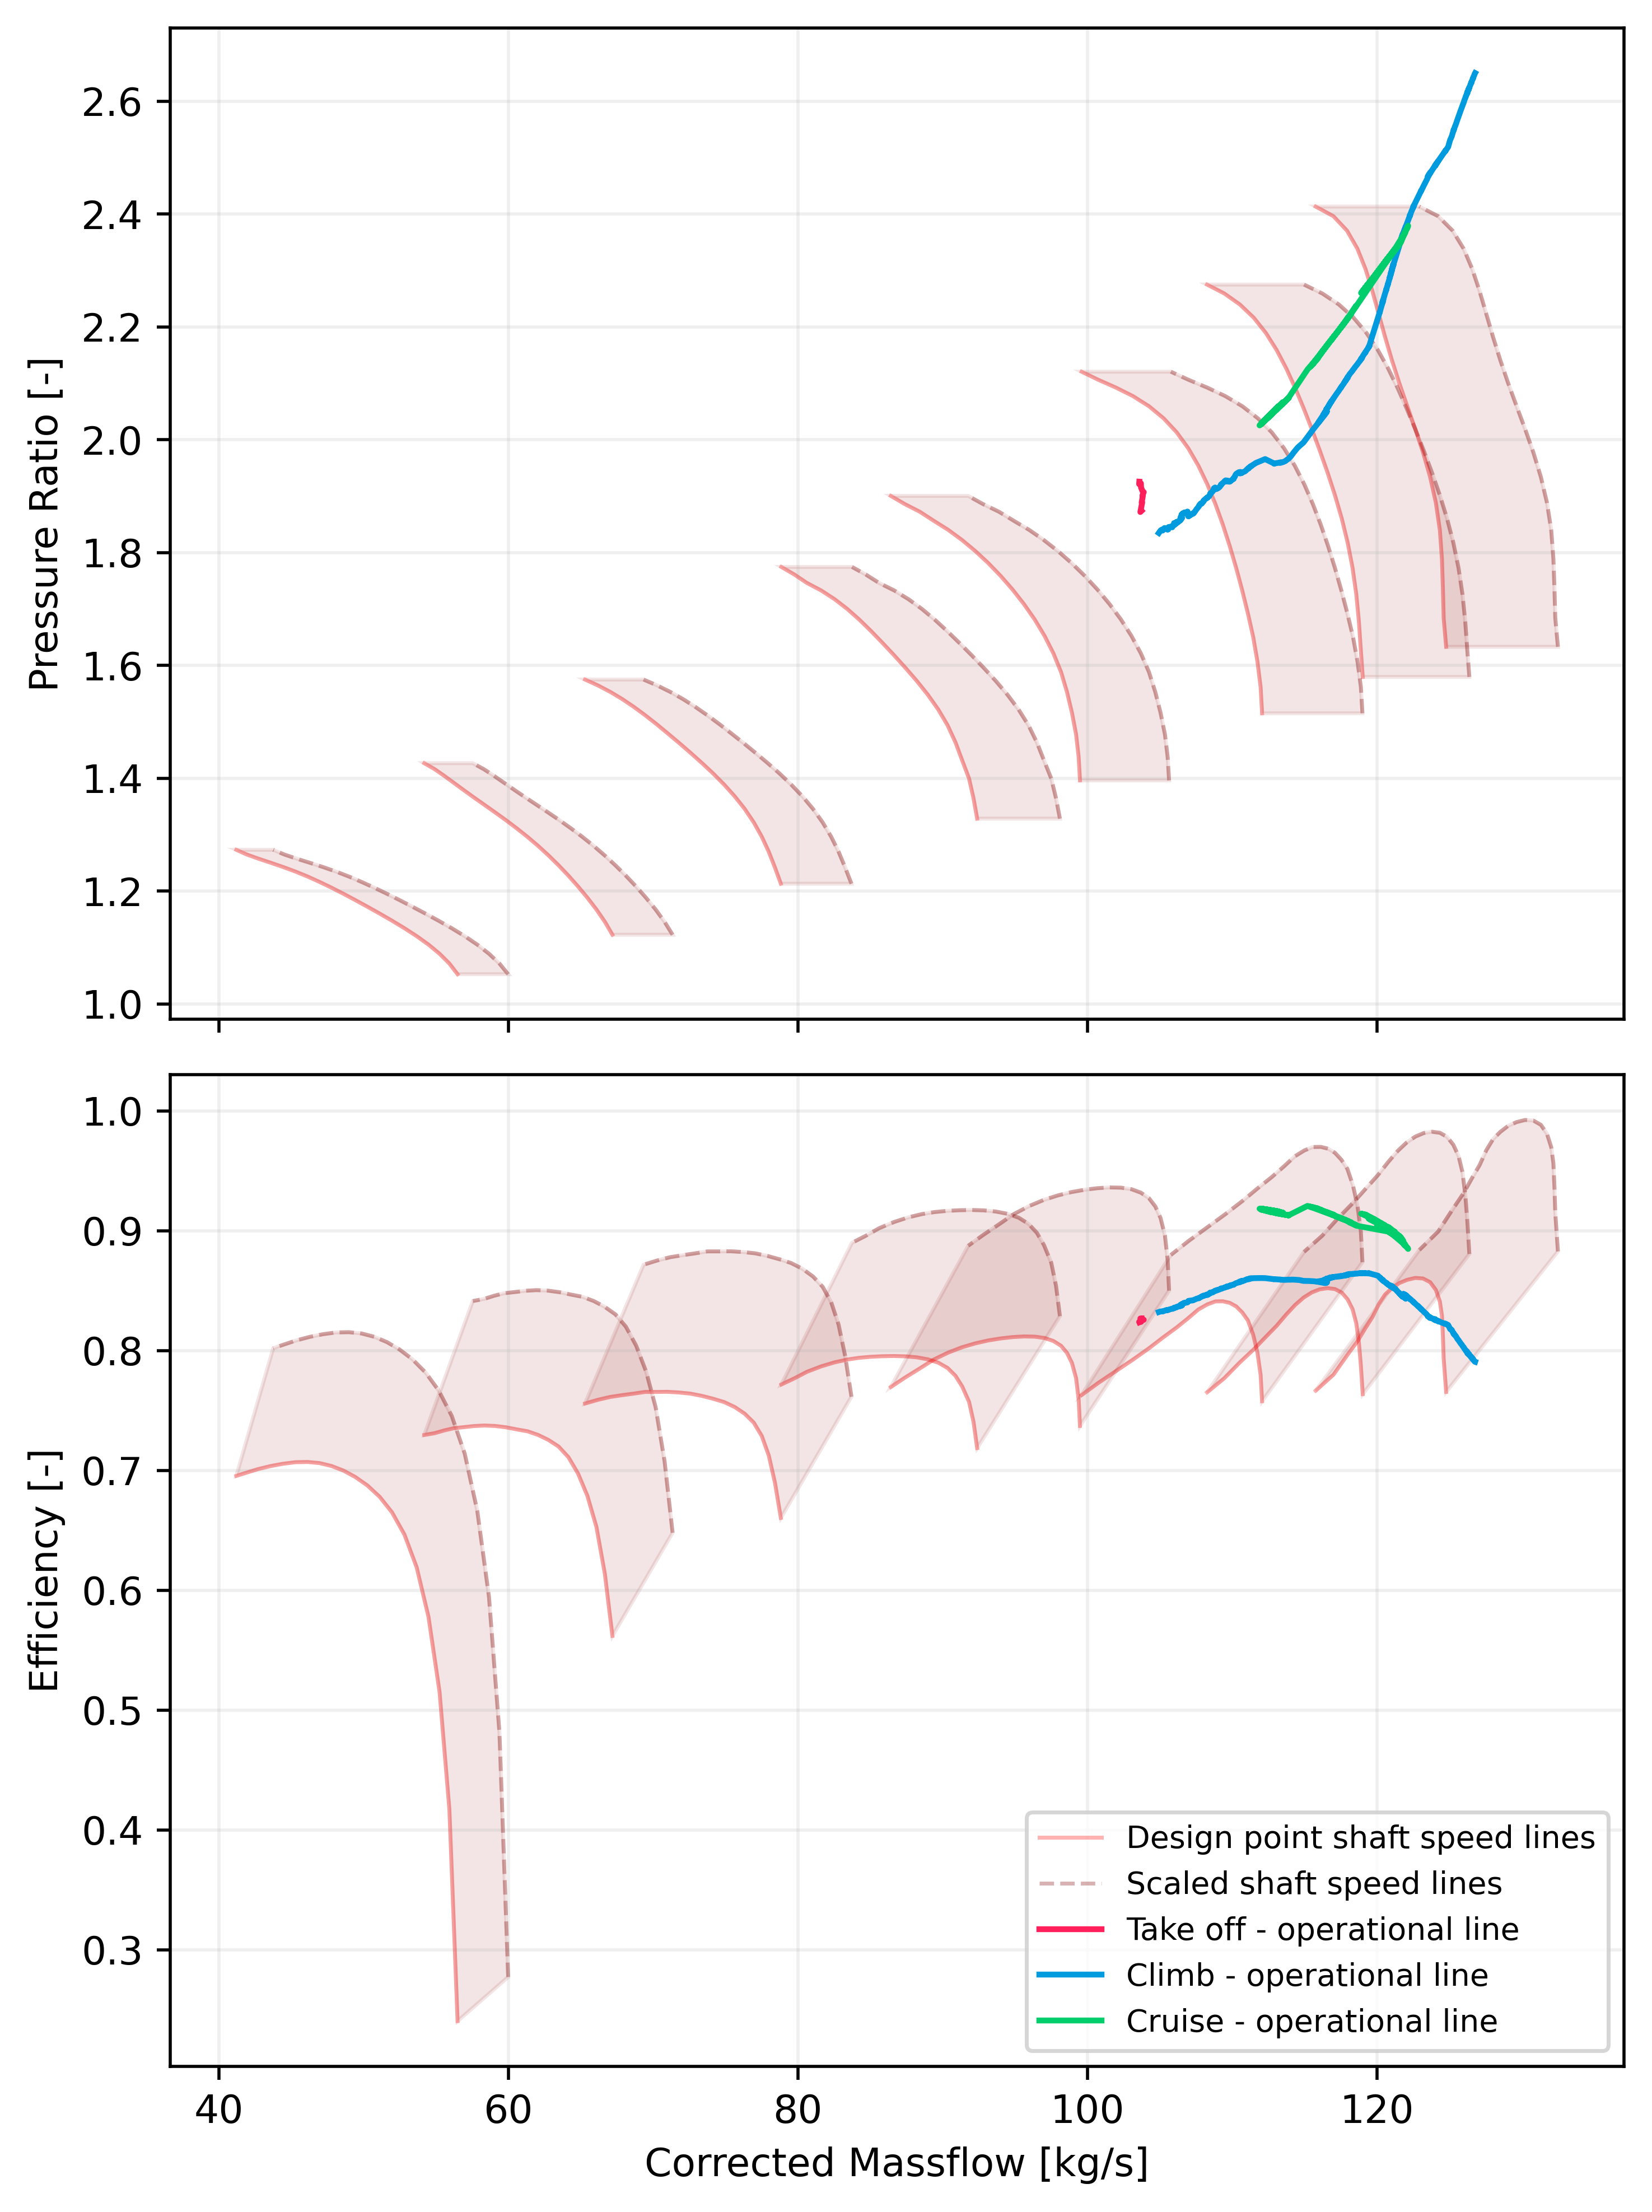

In [20]:
SF_m_fanc = scaling_F(Re2_DP, Re2, X[0], X[1], initial_value=SF_design_point_TO[0])
SF_e_fanc = scaling_F(Re2_DP, Re2, X[2], X[3], initial_value=SF_design_point_TO[1])
# plot_mapc("1_LPC_core", FancDP_SF_PR, FancDP_SF_Wc, FancDP_SF_Eta, FancDP_SF_Nc, 
#           [1, 1, 1], [SF_m_fan[0], SF_m_fan[7], SF_m_fan[14]], [SF_e_fan[0], SF_e_fan[7], SF_e_fan[14]])

plot_mapc("1_LPC_core", FancDP_SF_PR, FancDP_SF_Wc, FancDP_SF_Eta, FancDP_SF_Nc, 
          [1, 1], [SF_m_fanc[0], SF_m_fanc[-1]], [SF_e_fanc[0],  SF_e_fanc[-1]], [None, None])

[0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.400000006, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.600000024, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.699999988, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.

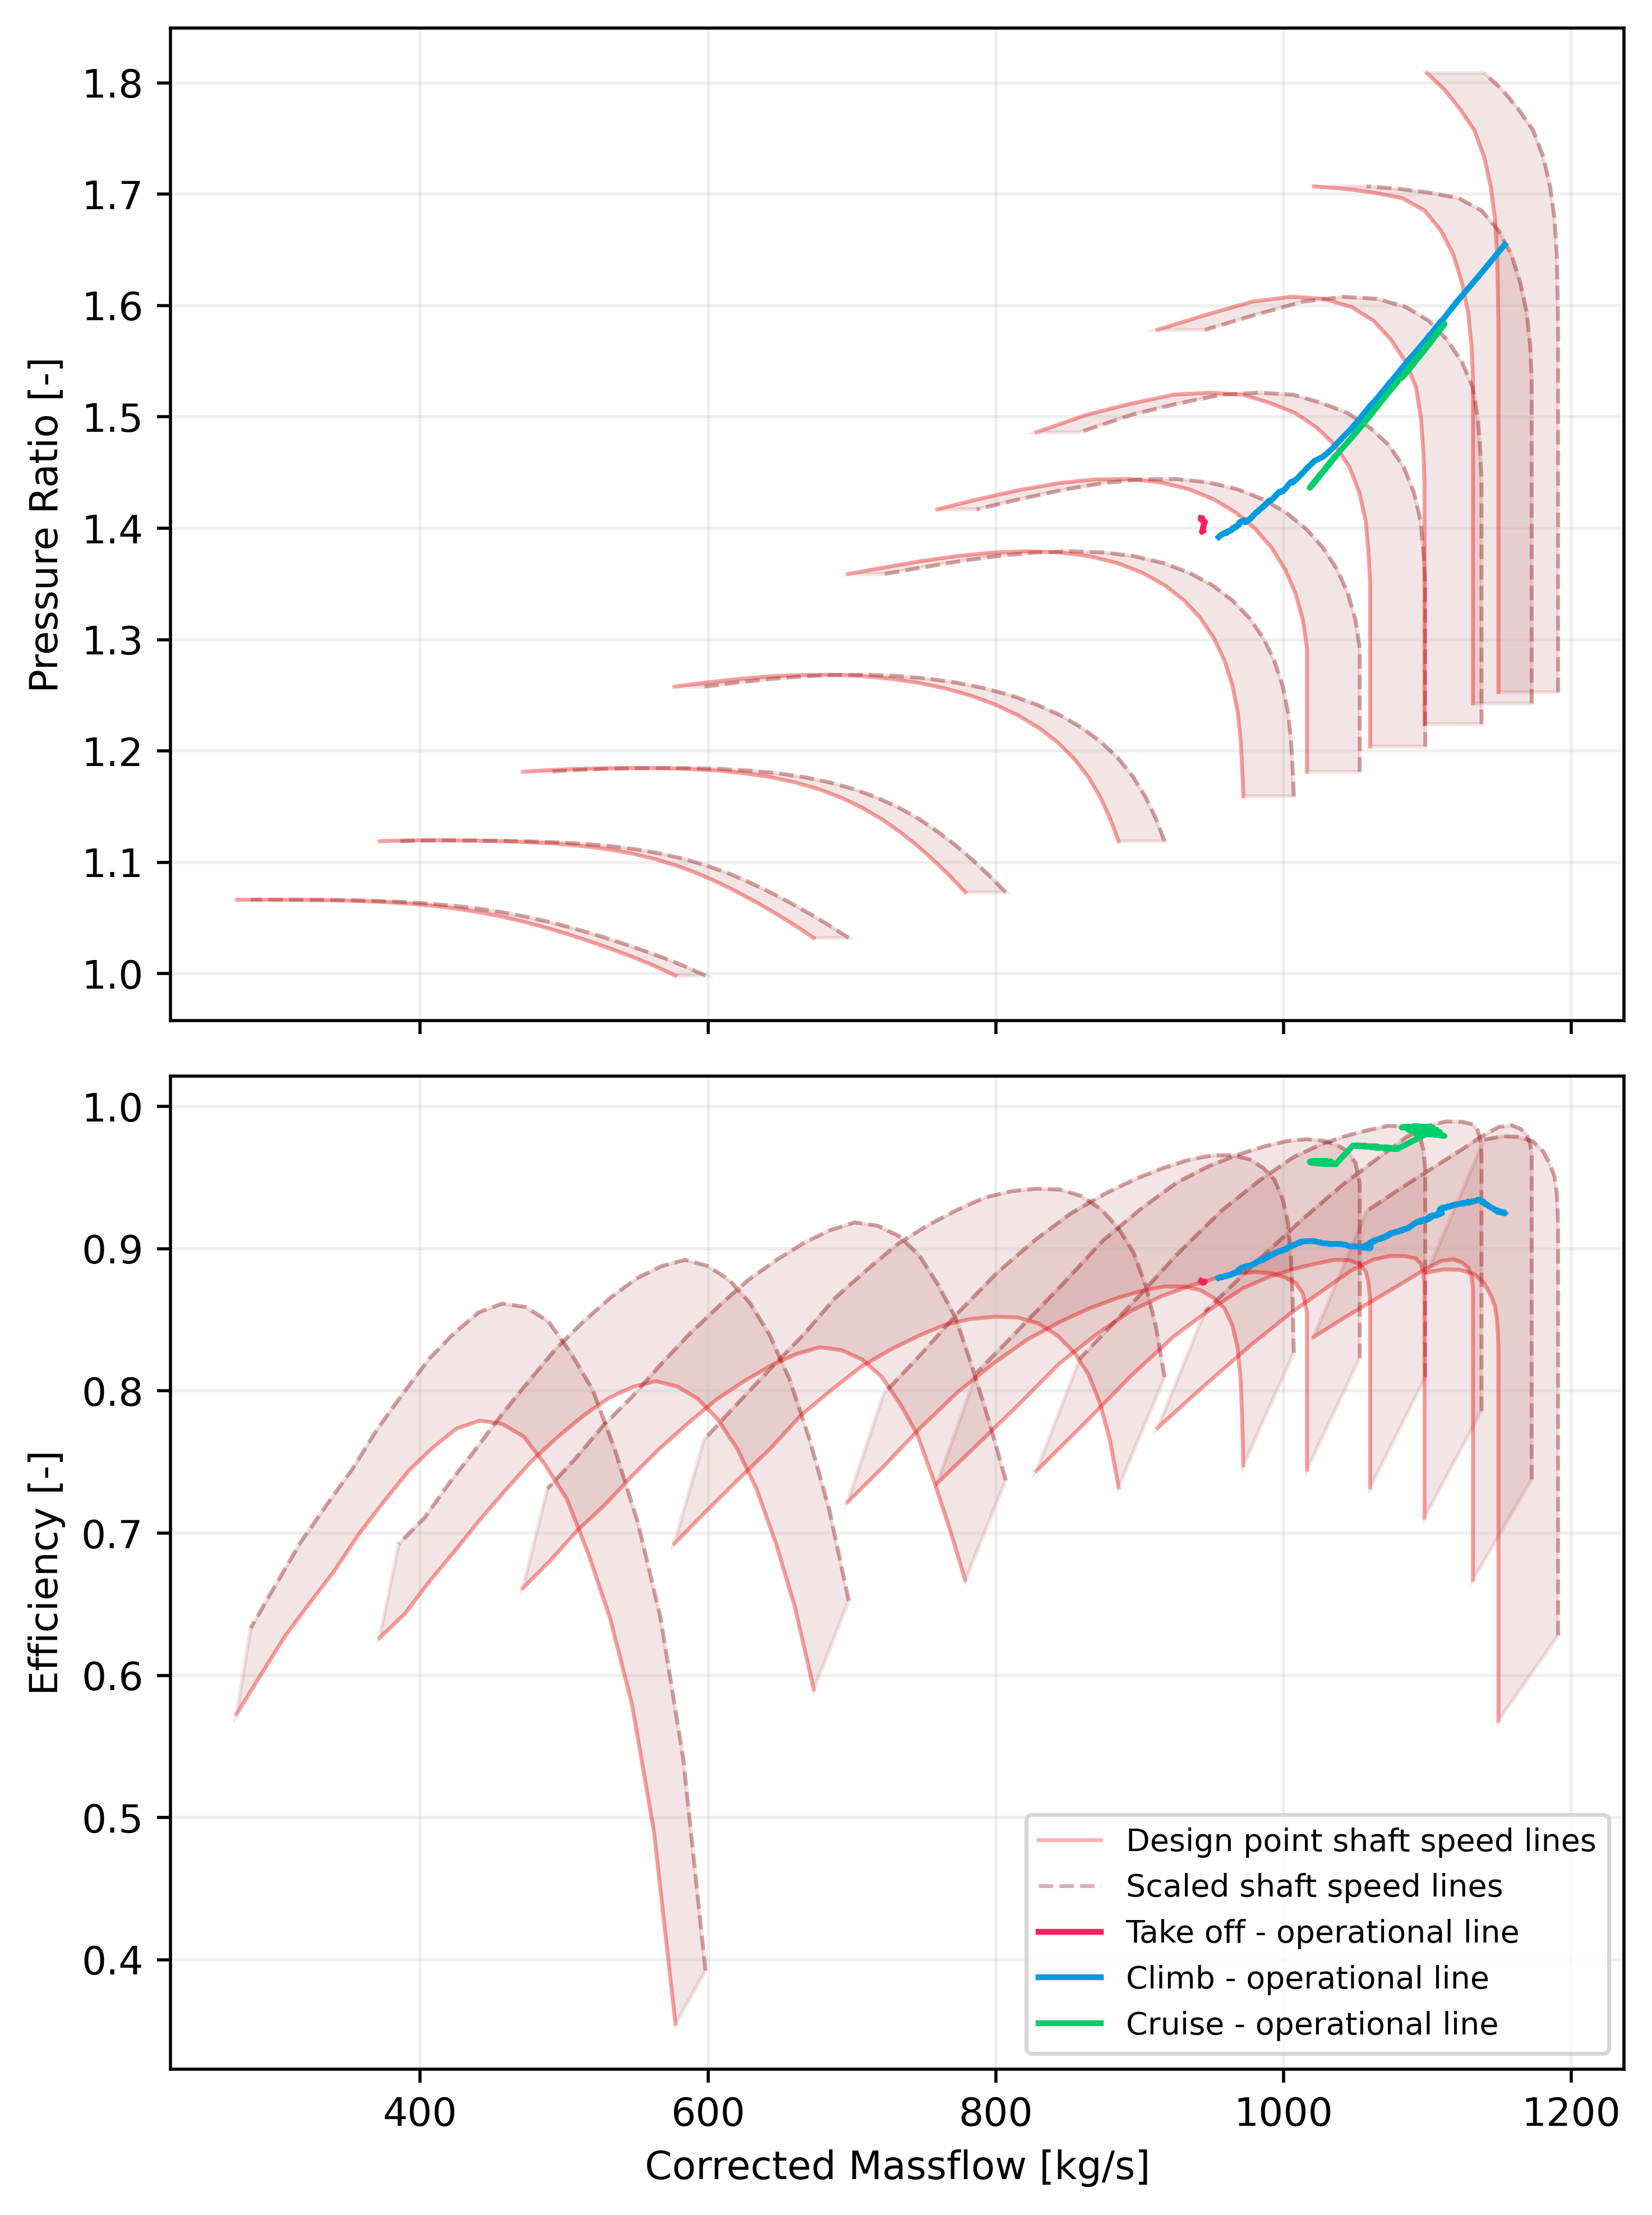

In [21]:
SF_m_fand = scaling_F(Re2_DP, Re2, X[4], X[5], initial_value=SF_design_point_TO[2])
SF_e_fand = scaling_F(Re2_DP, Re2, X[6], X[7],  initial_value=SF_design_point_TO[3])
plot_mapc("2_LPC_bypass", FandDP_SF_PR, FandDP_SF_Wc, FandDP_SF_Eta, FandDP_SF_Nc, 
          [1, 1], [SF_m_fand[0], SF_m_fand[-1]], [SF_e_fand[0], SF_e_fand[-1]], [None, None])

[0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.800000012, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.850000024, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.899999976, 0.944000006, 0.944000006, 0.944000006, 0.944000006, 0.944000006, 0.944000006, 0.944000006, 0.944000

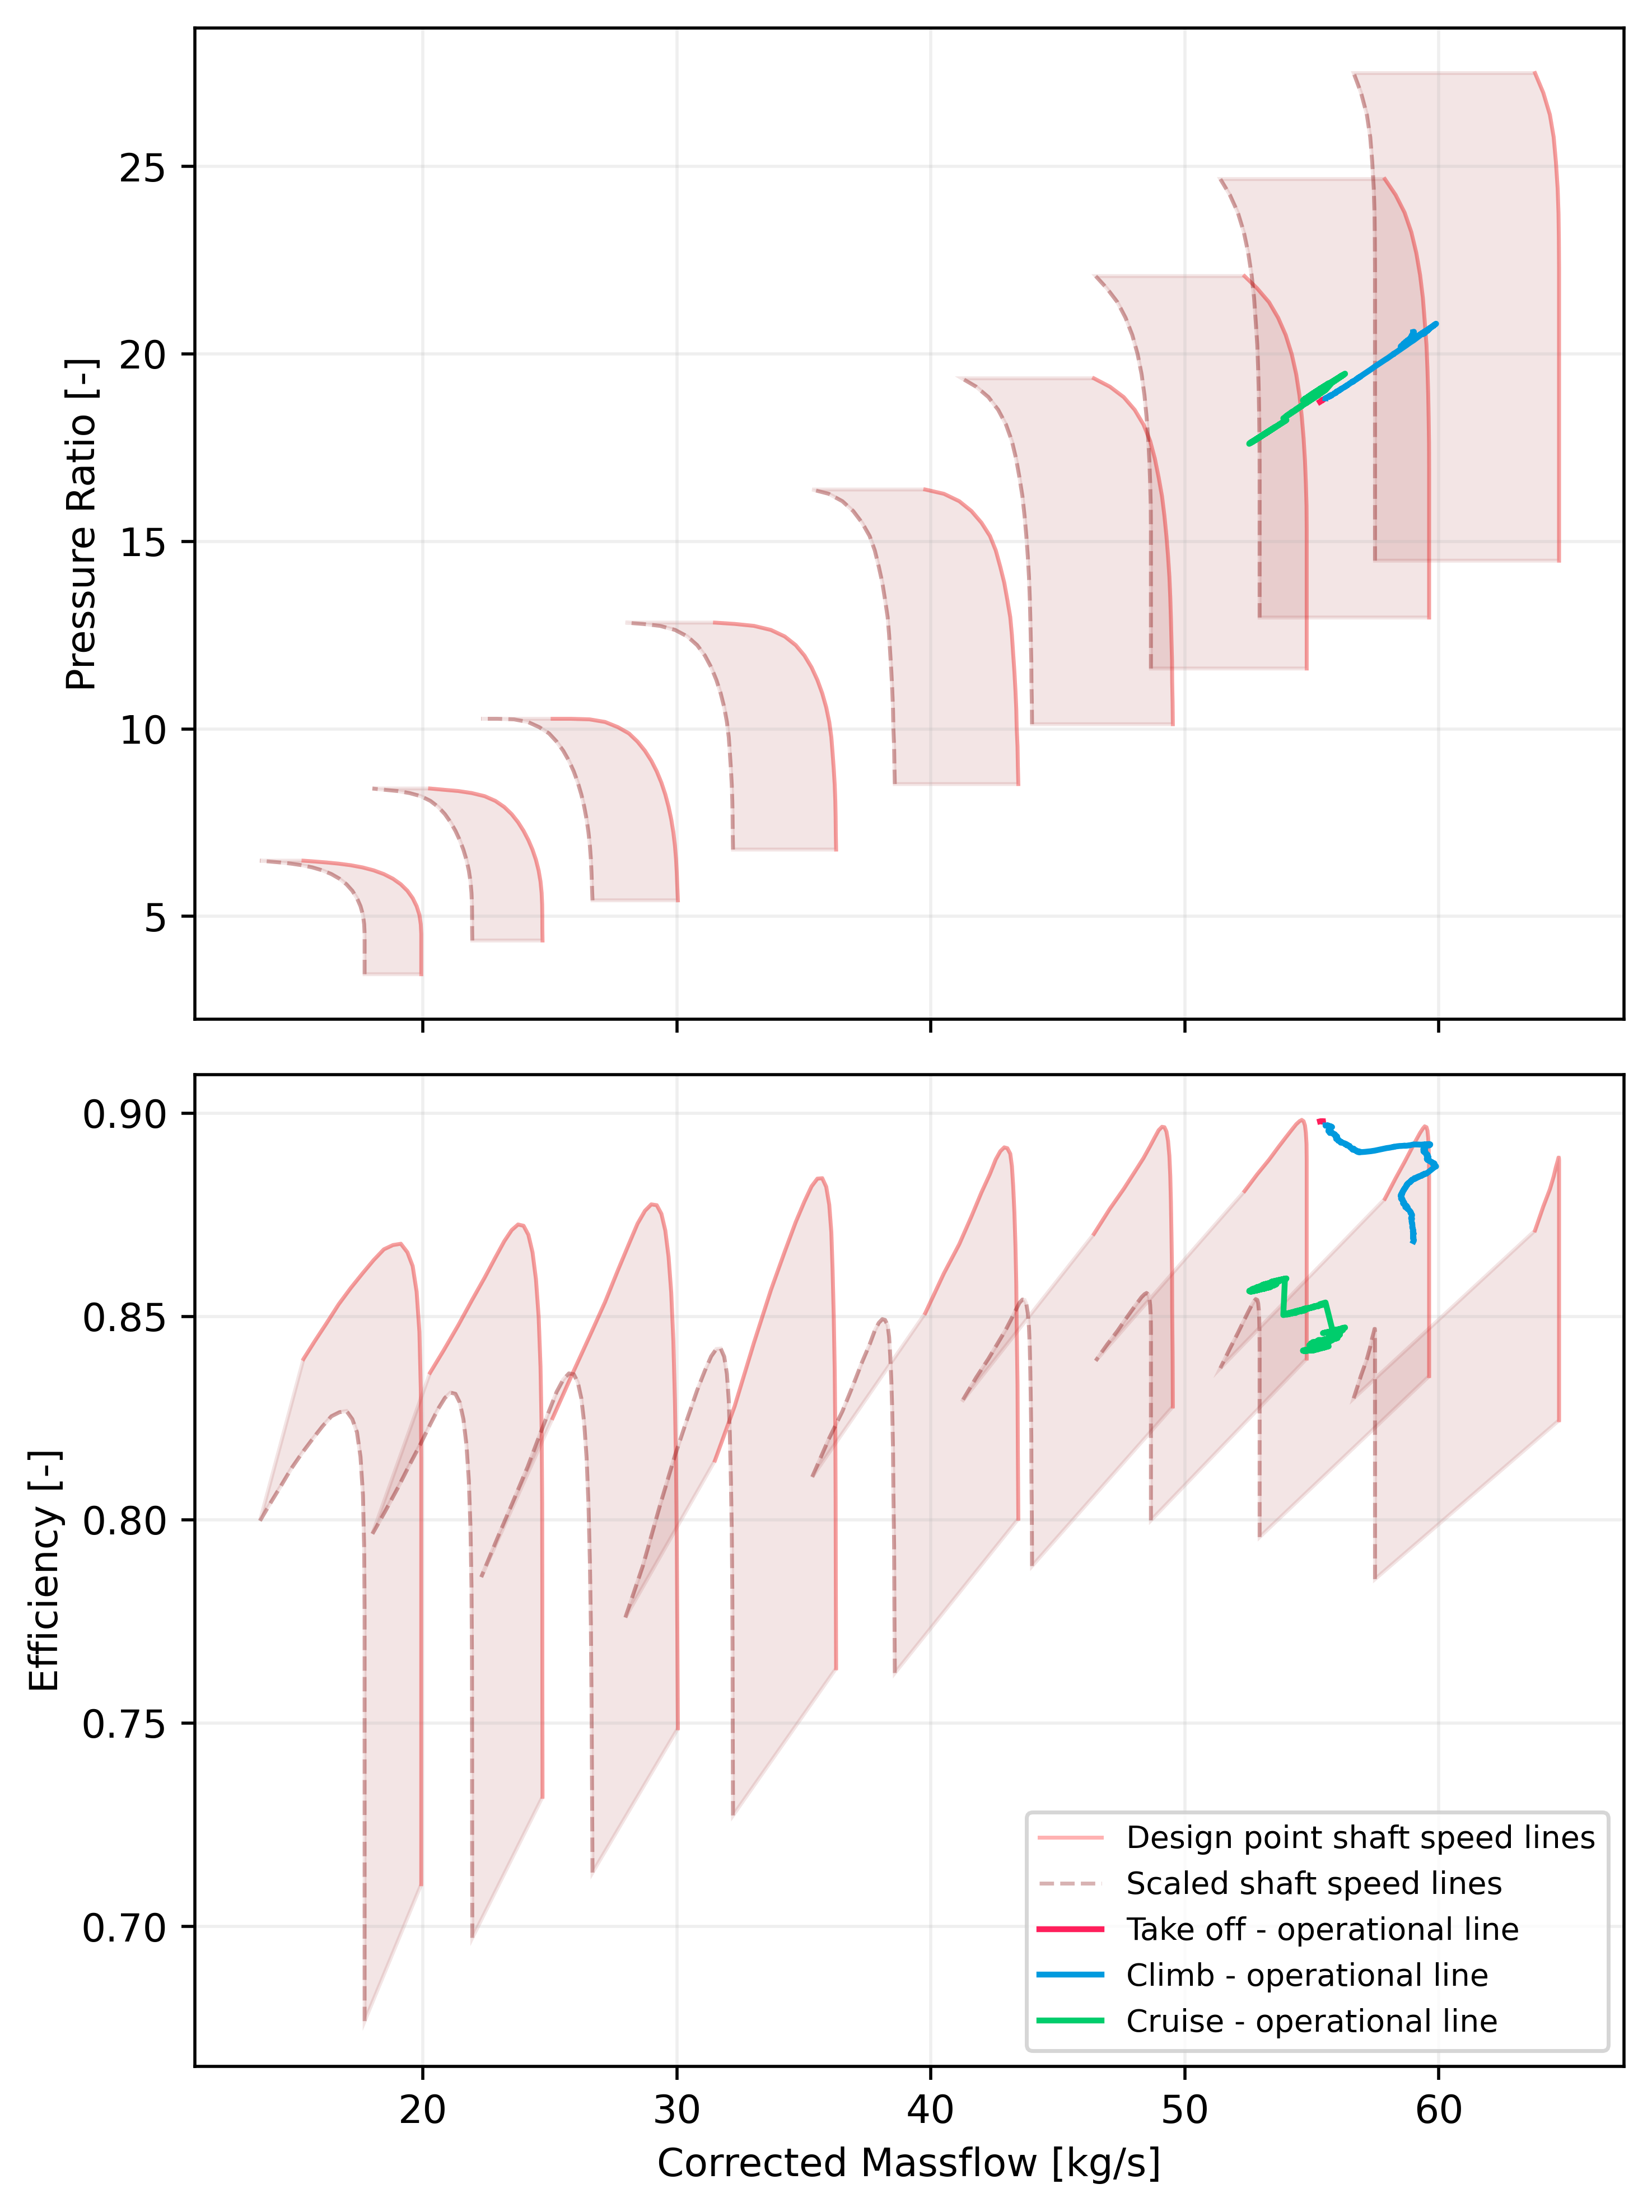

In [22]:
SF_m_hpc = scaling_F(Re25_DP, Re25, X[8], X[9],initial_value=SF_design_point_TO[4])
SF_e_hpc = scaling_F(Re25_DP, Re25, X[10], X[11], initial_value=SF_design_point_TO[5])
plot_mapc("3_HPC", HPCDP_SF_PR,  HPCDP_SF_Wc,  HPCDP_SF_Eta,  HPCDP_SF_Nc, 
          [1, 1], [SF_m_hpc[0], SF_m_hpc[-1]], [SF_e_hpc[0], SF_e_hpc[-1]], [None, None])

In [27]:
def plot_mapT(file_name, DP_SF_PR, DP_SF_Wc, DP_SF_Eta, DP_SF_Nc, OD_SF_PR, OD_SF_Wc, OD_SF_Eta):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), dpi=500, sharex='col')
    
    PRminR, PRmaxR, MdotTR, EtaTR, NPrTR, NTR, B = read_mapT(file_name, file_name, 0)
    PRmin, PRmax, MdotT, EtaT, NPrT, NT, B = read_mapT(file_name, file_name, 1)
    # extraxt the iso speed lines
    no_betalines = len(B)
    listsER = np.array([EtaTR[x:x + no_betalines] for x in range(0, len(EtaTR), no_betalines)], dtype=object)
    listsMR = np.array([MdotTR[x:x + no_betalines] for x in range(0, len(MdotTR), no_betalines)], dtype=object)
    listsE  = np.array([EtaT[x:x + no_betalines] for x in range(0, len(EtaTR), no_betalines)], dtype=object)
    listsM  = np.array([MdotT[x:x + no_betalines] for x in range(0, len(MdotTR), no_betalines)], dtype=object)

    listsPR_R = np.zeros(listsER.shape)
    listsPR   = np.zeros(listsE.shape)

    for i in range(len(PRmax) - 1):
        p_ref  = np.polyfit([0, 1], [PRminR[i + 1], PRmaxR[i + 1]], 1)
        p      = np.polyfit([0, 1], [PRmin[i + 1], PRmax[i + 1]], 1)
        PR_ref = np.polyval(p_ref, B)
        PR     = np.polyval(p, B)
        listsPR_R[i, 0:no_betalines] = PR_ref
        listsPR[i, 0:no_betalines]   = PR
    
    listsPR = DP_SF_PR * (listsPR - 1) + 1
    listsM = DP_SF_Wc * listsM
    listsE  = DP_SF_Eta * listsE
    
    # plotting
    
    plot_PR_low = OD_SF_PR[0] * (listsPR - 1) + 1
    plot_Mdot_low = OD_SF_Wc[0] * listsM
    plot_Eta_low = OD_SF_Eta[0] * listsE
    
    plot_PR_high = OD_SF_PR[1] * (listsPR - 1) + 1
    plot_Mdot_high = OD_SF_Wc[1] * listsM
    plot_Eta_high = OD_SF_Eta[1] * listsE
    
    
    iter_length = int(len(listsER)/len(np.unique(listsER)))
#     for SF_PR, SF_Wc, SF_Eta, color, legend in zip(OD_SF_PR, OD_SF_Wc, OD_SF_Eta, ['#FF1F5B', '#009ADE', '#00CD6C'],
#                                                   ['Take off', 'Climb', 'Cruise']):

    for i in range(len(plot_Mdot_low)):
        if i==0:
            legend_low = 'Design point shaft speed lines'
            legend_high = 'Scaled shaft speed lines'
        else:
            legend_low = None
            legend_high = None

        ax1.plot(plot_PR_low[i], plot_Eta_low[i], c='red', label=legend_low, linewidth=0.3, alpha=0.5)  
        ax1.plot(plot_PR_high[i], plot_Eta_high[i], c='maroon', label=legend_high, linewidth=0.3, alpha=0.5,  linestyle='--')  

        ax2.plot(plot_PR_low[i], plot_Mdot_low[i], c='red', label=legend_low, linewidth=0.3, alpha=0.5)  
        ax2.plot(plot_PR_high[i], plot_Mdot_high[i], c='maroon', label=legend_high, linewidth=0.3, alpha=0.5, linestyle='--')  
        
#         ax1.fill(np.append(plot_PR_high, plot_PR_low[::-1]), 
#                  np.append(plot_Eta_high, plot_Eta_low[::-1]), color='darkred', alpha=0.15)
        
#         ax2.plot(listsPR_R[i], listsMR[i], linestyle="-.", c='grey') 
#         ax2.plot(plot_PR[i], plot_Wc[i], c=color, label=legend, linewidth=1)  

    for i, color, legend in zip(range(3), ['#FF1F5B', '#009ADE', '#00CD6C'], 
                                ['Take off - operational line', 'Climb - operational line', 'Cruise - operational line']):
        OPR, PRc_Fan, PRd_Fan, PR_HPC, PR_HPT, PR_LPT, PR_d, PR_nozzle, PR_bypass = np.array(ALL_PRs[i]).T
        ETAc_Fan, ETAd_Fan, ETA_HPC, ETA_HPT, ETA_LPT = np.array(All_ETAs[i]).T
        W_14, W_25, W_4, Wc2, Wcc_fan, Wcd_fan, Wc25, Wc4, Wc49 = np.array(All_Ws[i]).T
        alt, time = np.array(alt_time[i]).T
        sorted_indices = np.argsort(time)
        
        if file_name == '4_HPT':
            print(file_name)
            Wc = Wc4
            PR = PR_HPT
            Eta = ETA_HPT
            
        elif file_name == '5_LPT':
            print(file_name)
            Wc = Wc49
            PR = PR_LPT
            Eta = ETA_LPT
            
        Wc = Wc[sorted_indices]
        PR = PR[sorted_indices]
        Eta = Eta[sorted_indices]
        
        ax1.plot(PR, Eta, label=legend, c=color, linewidth=1.5)
        ax2.plot(PR, Wc, label=legend, c=color, linewidth=1.5)

#     ax1.set_xlabel("Pressure Ratio")
    ax1.set_ylabel("Efficiency [-]")
    ax1.grid()
#     ax1.set_title(file_name)
    ax2.set_xlabel("Pressure Ratio [-]")
    ax2.set_ylabel("Corrected Massflow [kg/s]")
    ax2.grid()
#     ax2.set_title(file_name)
    ax2.legend(loc='lower right', prop={'size': 8})
    plt.tight_layout()
    plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
       + file_name + '.jpeg')
    plt.show()
    


4_HPT
4_HPT
4_HPT


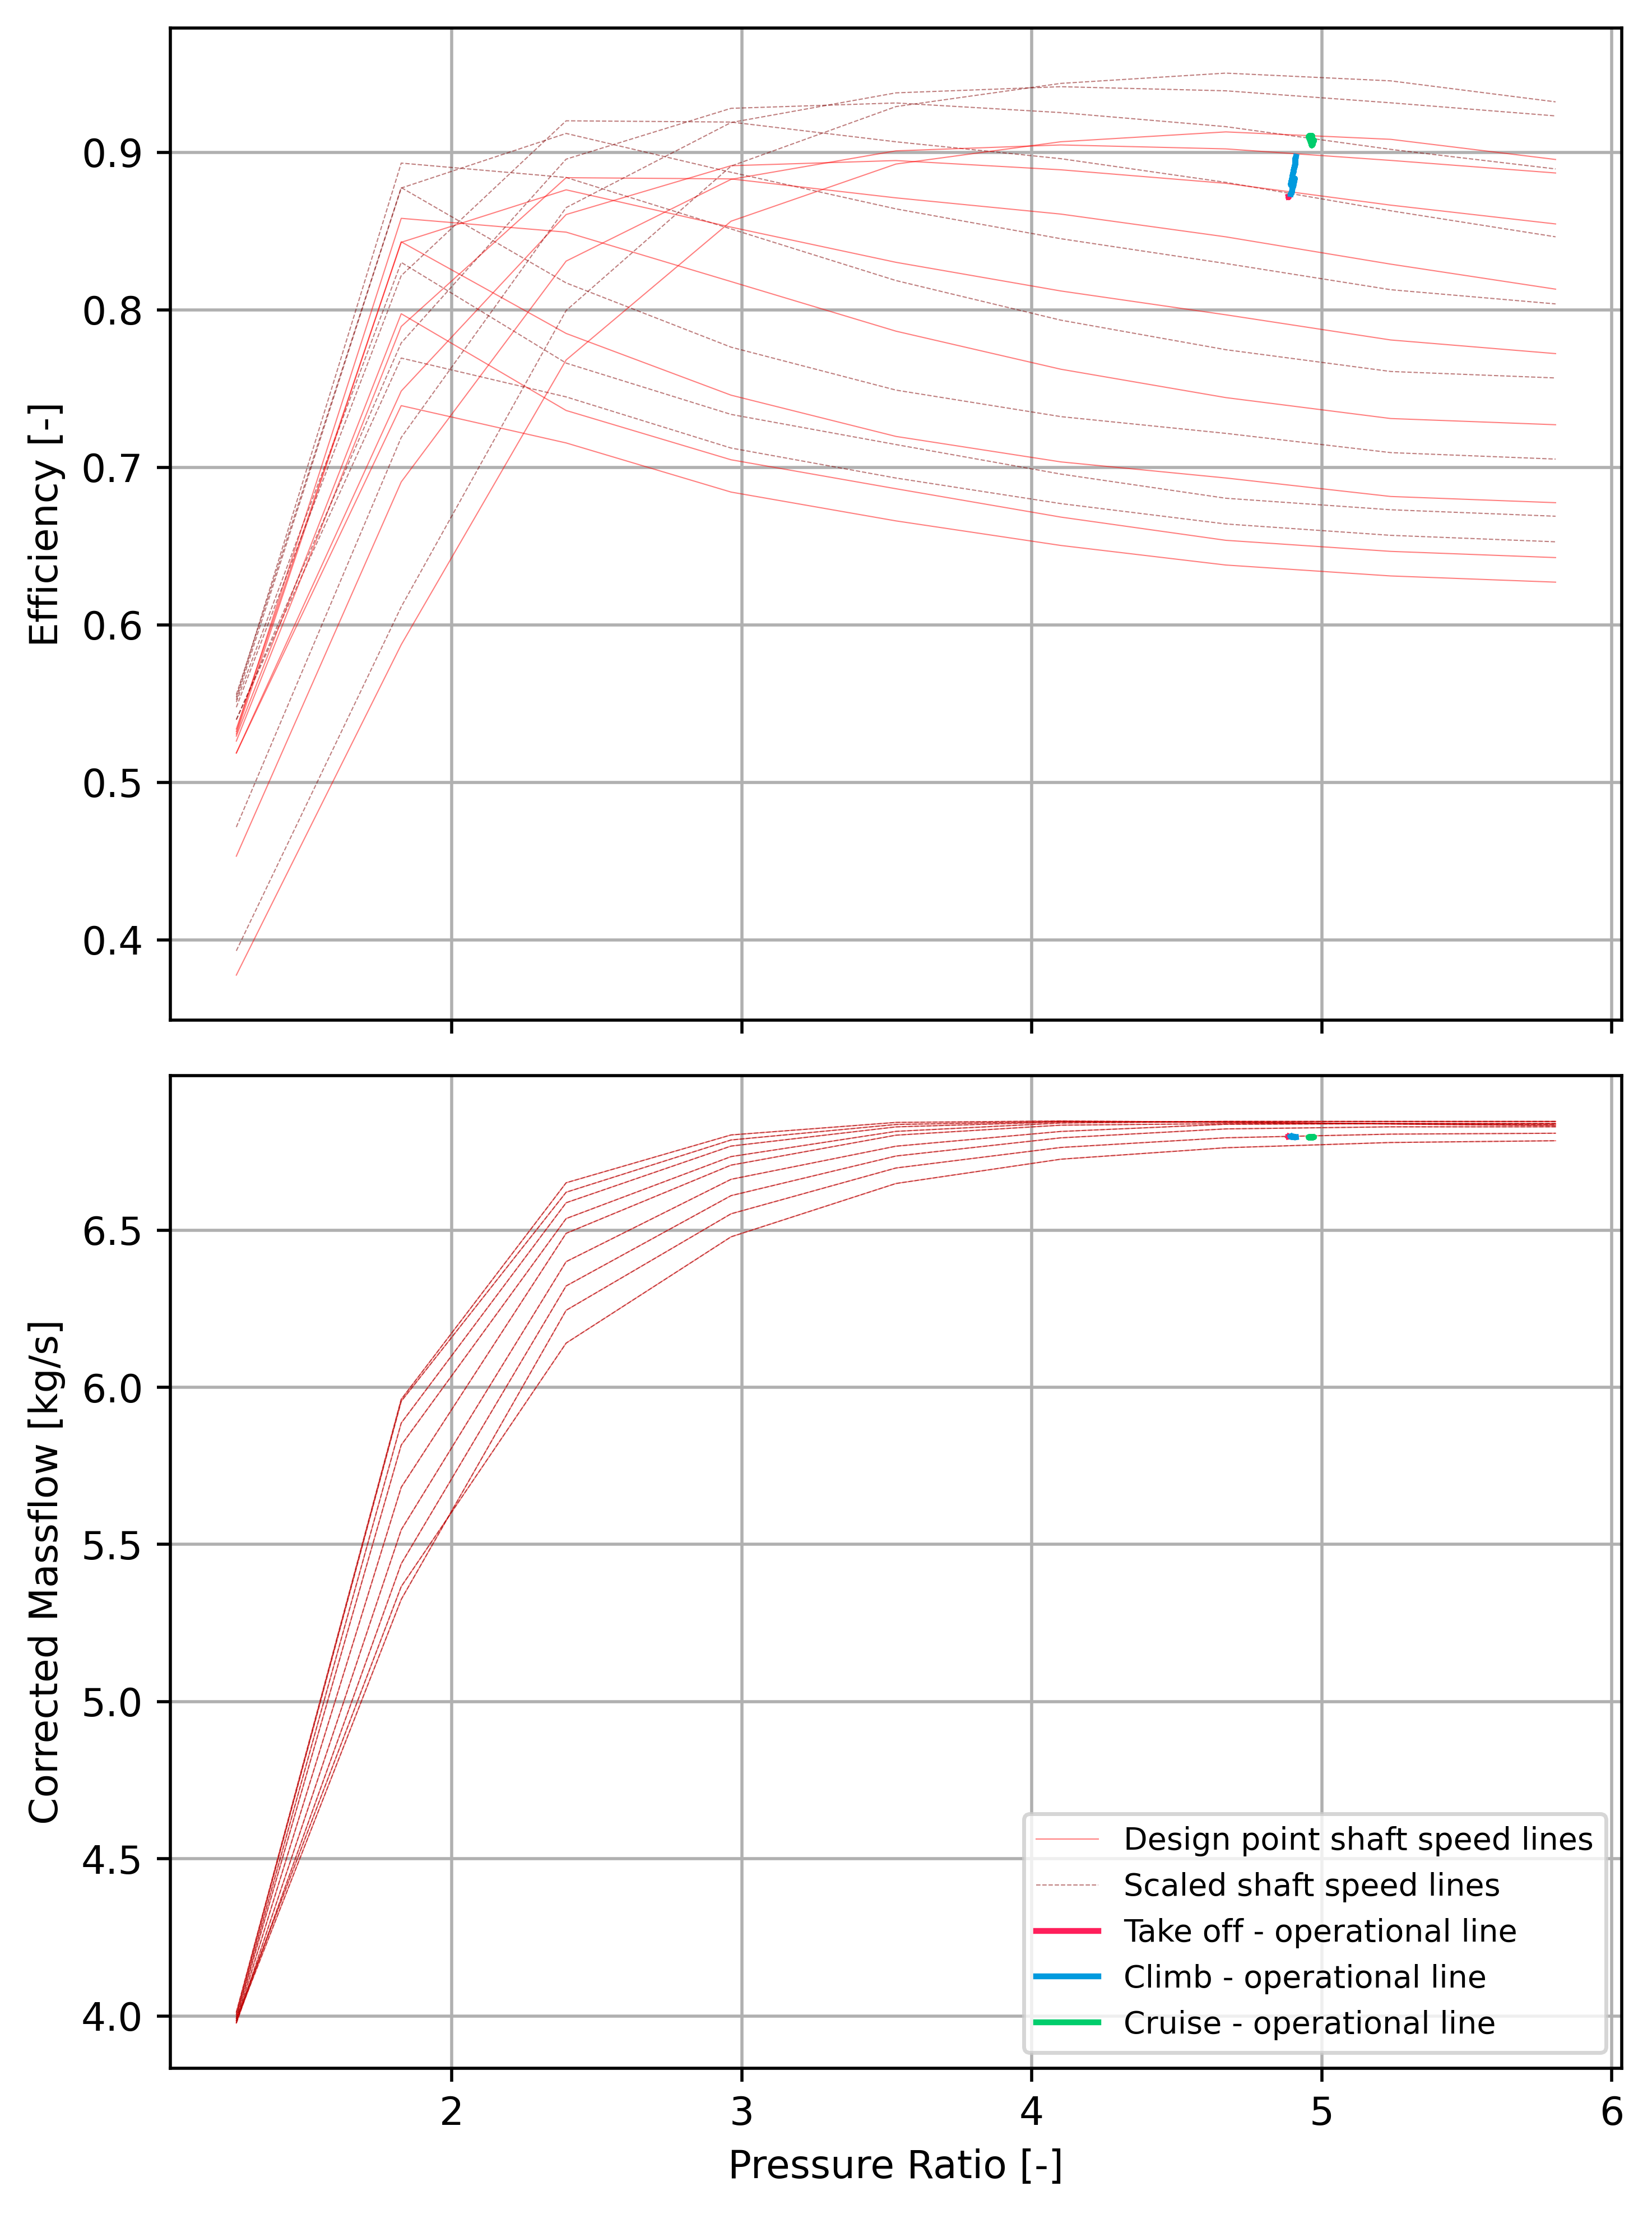

In [28]:
SF_e_HPT = scaling_F(Re4_DP, Re4, X[12], X[13], initial_value=SF_design_point_TO[6])
plot_mapT("4_HPT", HPTDP_SF_PR, HPTDP_SF_Wc, HPTDP_SF_Eta, HPTDP_SF_Nc,
      [1, 1], [1, 1], [SF_e_HPT[0], SF_e_HPT[14]])

5_LPT
5_LPT
5_LPT


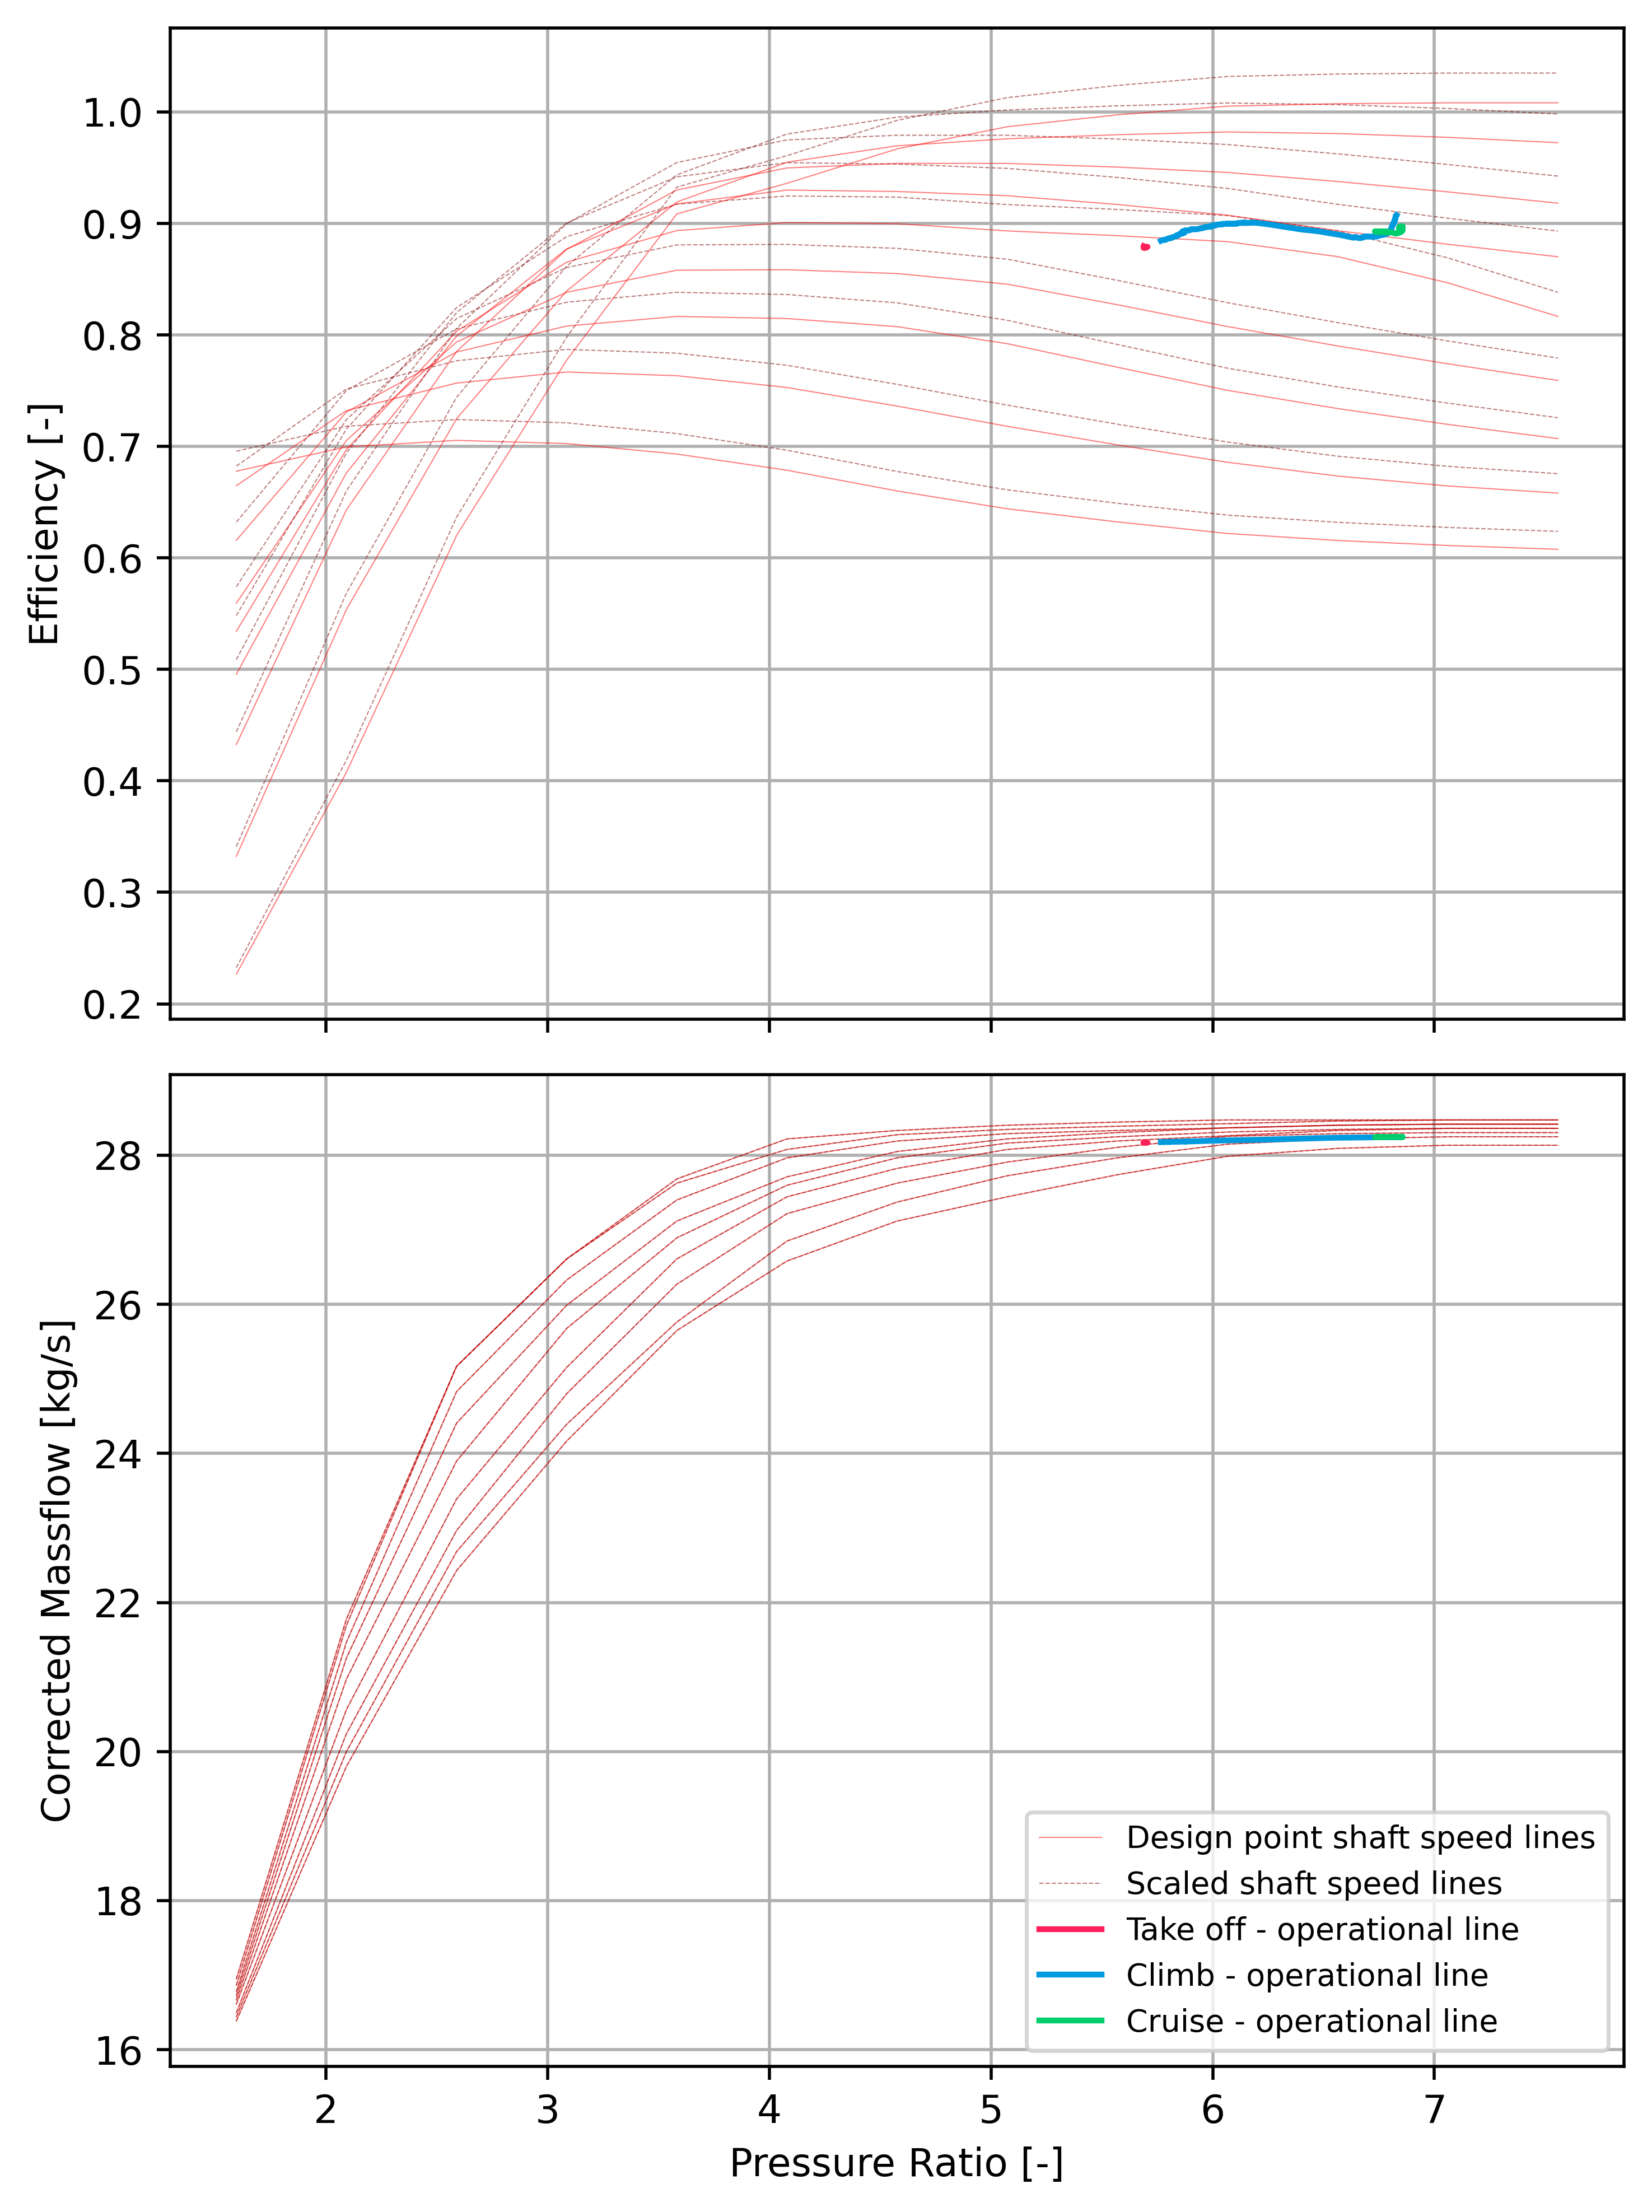

In [29]:
SF_e_LPT = scaling_F(Re49_DP, Re49, X[14], X[15], initial_value=SF_design_point_TO[7])
plot_mapT("5_LPT", LPTDP_SF_PR, LPTDP_SF_Wc, LPTDP_SF_Eta, LPTDP_SF_Nc,
      [1, 1], [1, 1], [SF_e_LPT[0], SF_e_LPT[14]])

In [9]:



# plot_mapc("2_LPC_bypass", FandDP_SF_PR, FandDP_SF_Wc, FandDP_SF_Eta, FandDP_SF_Nc)
# plot_mapc("3_HPC", HPCDP_SF_PR,  HPCDP_SF_Wc,  HPCDP_SF_Eta,  HPCDP_SF_Nc)
